In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import keras
import keras.layers as layers
import tensorflow as tf
from keras import optimizers
from keras.optimizers import rmsprop_v2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cal_housing = fetch_california_housing()

In [ ]:
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))

first = np.array(X)

df2_normalized = normalizer(np.array(X)).numpy()

with np.printoptions(precision=2, suppress=True):

  

  print('Normalized:', normalizer(first).numpy())



Normalized: [[ 2.34  0.98  0.63 ... -0.05  1.05 -1.33]
 [ 2.33 -0.61  0.33 ... -0.09  1.04 -1.32]
 [ 1.78  1.86  1.16 ... -0.03  1.04 -1.33]
 ...
 [-1.14 -0.92 -0.09 ... -0.07  1.78 -0.82]
 [-1.05 -0.85 -0.04 ... -0.09  1.78 -0.87]
 [-0.78 -1.   -0.07 ... -0.04  1.75 -0.83]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2_normalized, y, test_size=0.2, random_state=0)

In [ ]:
print(df2_normalized)

[[ 2.3447661   0.9821439   0.6285595  ... -0.04959657  1.0525392
  -1.3278488 ]
 [ 2.3322384  -0.60701865  0.32704142 ... -0.09251229  1.0431752
  -1.3228564 ]
 [ 1.7826998   1.8561833   1.1556206  ... -0.02584255  1.0384924
  -1.3328373 ]
 ...
 [-1.1425923  -0.9248512  -0.09031817 ... -0.07173454  1.7782292
  -0.82372886]
 [-1.0545819  -0.84539306 -0.04021112 ... -0.0912252   1.7782292
  -0.87364084]
 [-0.7801285  -1.0043093  -0.07044264 ... -0.0436822   1.7501373
  -0.8337097 ]]


In [ ]:
x_train = tf.convert_to_tensor(X_train)
Y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(X_test)
Y_test = tf.convert_to_tensor(y_test)
print(x_train.shape)
print(y_train.shape)

(16512, 8)
(16512,)


In [ ]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Flatten(input_shape=[8], name="inputLayer"))
model2.add(tf.keras.layers.Dense(30, activation="relu", name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 8)                 0         
                                                                 
 HiddenLayer1 (Dense)        (None, 30)                270       
                                                                 
 outputLayer (Dense)         (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=["mean_squared_error"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history2 = model2.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 3.8977 - mean_squared_error: 3.8977 - val_loss: 3.1650 - val_mean_squared_error: 3.1650
Epoch 2/20
413/413 [==============================] - 1s 1ms/step - loss: 2.5627 - mean_squared_error: 2.5627 - val_loss: 2.0221 - val_mean_squared_error: 2.0221
Epoch 3/20
413/413 [==============================] - 0s 1ms/step - loss: 1.6808 - mean_squared_error: 1.6808 - val_loss: 1.3794 - val_mean_squared_error: 1.3794
Epoch 4/20
413/413 [==============================] - 1s 1ms/step - loss: 1.2163 - mean_squared_error: 1.2163 - val_loss: 1.0672 - val_mean_squared_error: 1.0672
Epoch 5/20
413/413 [==============================] - 1s 1ms/step - loss: 0.9971 - mean_squared_error: 0.9971 - val_loss: 0.9222 - val_mean_squared_error: 0.9222
Epoch 6/20
413/413 [==============================] - 1s 1ms/step - loss: 0.8928 - mean_squared_error: 0.8928 - val_loss: 0.8469 - val_mean_squared_error: 0.8469
Epoch 7/20
413/413 [========

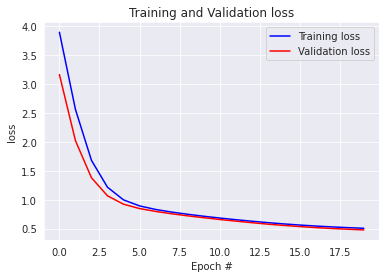

In [ ]:

sns.set_style("darkgrid")
#get the details form the history object
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(20)
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()



In [ ]:
model2.evaluate(x_test,Y_test) #as we can see model is performing well. since the test loss is less and is close to training error.

129/129 [==============================] - 0s 1ms/step - loss: 0.5006 - mean_squared_error: 0.5006


[0.5005894899368286, 0.5005894899368286]

In [ ]:
input1 = keras.Input(shape = 5)
input2 = keras.Input(shape = 6)
layer1 = layers.Dense(30, activation = 'relu')(input1)
layer2 = layers.Dense(30, activation = 'relu')(layer1)
# layer3 = tf.concat([layer2,input2],1)
layer3 = keras.layers.concatenate([layer2,input2],1)
outputs = layers.Dense(1, activation = 'relu')(layer3)

model = keras.Model(inputs = [input1,input2], outputs = outputs)



In [ ]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=["mean_squared_error"],
)

In [ ]:
history = model.fit([x_train[:,0:5],x_train[:,2:8]], Y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 4.2487 - mean_squared_error: 4.2487 - val_loss: 2.6307 - val_mean_squared_error: 2.6307
Epoch 2/20
413/413 [==============================] - 1s 1ms/step - loss: 1.8817 - mean_squared_error: 1.8817 - val_loss: 1.2583 - val_mean_squared_error: 1.2583
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 1.1836 - mean_squared_error: 1.1836 - val_loss: 0.9847 - val_mean_squared_error: 0.9847
Epoch 4/20
413/413 [==============================] - 1s 1ms/step - loss: 1.0021 - mean_squared_error: 1.0021 - val_loss: 0.8634 - val_mean_squared_error: 0.8634
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.8969 - mean_squared_error: 0.8969 - val_loss: 0.7759 - val_mean_squared_error: 0.7759
Epoch 6/20
413/413 [==============================] - 1s 1ms/step - loss: 0.8211 - mean_squared_error: 0.8211 - val_loss: 0.7110 - val_mean_squared_error: 0.7110
Epoch 7/20
413/413 [========

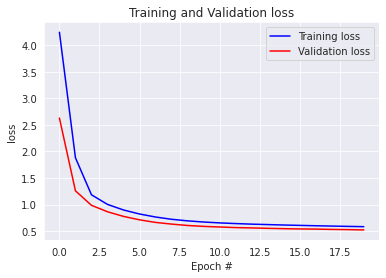

In [ ]:

sns.set_style("darkgrid")
#get the details form the history object
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(20)
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()

In [ ]:
model.evaluate([x_test[:,0:5],x_test[:,2:8]],Y_test)#as we can see model is performing well. since the test loss is less and is close to training error.

129/129 [==============================] - 0s 1ms/step - loss: 0.7992 - mean_squared_error: 0.7992


[0.7992082238197327, 0.7992082238197327]